## Graphs for baseline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

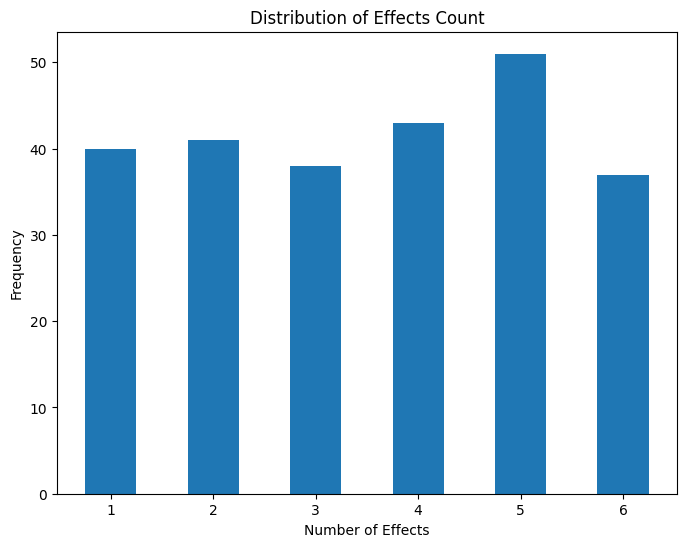

In [4]:
df = pd.read_csv('./results/dataset_audios_guitar_low_ranges_w_clean.csv')

# Function to count items in the applied_effects dictionary
def count_effects(effects_str):
    effects_dict = ast.literal_eval(effects_str)
    return len(effects_dict)

# Count occurrences of each effect count
effect_counts_distribution = df['applied_effects'].apply(count_effects).value_counts().sort_index()


# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(effect_counts_distribution.index, effect_counts_distribution.values, color="C0", width=0.5)

# Add titles and labels
plt.title('Distribution of Effects Count')
plt.xlabel('Number of Effects', )
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Graphs for tests (full ranges)

onset_threshold = 0.5 <br>
frame_threshold = 0.3<br>
threshold = 2.2<br>
fan_out = 25<br>
max_distance_atan = 20<br> 
max_key_distance = 50 <br>

instrument_program = 30<br>
constellation_map_alg = z_score_peaks_calculation<br>
fitness = fitness_lines_difference_for_parallel_comp<br>

pop_size = 250<br>
p_mutation = 0.8<br>
p_crossover = 0.6<br>
p_pop_item = 0.5<br>
p_add_new_effect = 0.5<br>
n_iter = 15<br>
t_size = 5<br>

effect_structure = {<br>
    0: { "rate_hz": ('float', (0.0, 100.0)), },# Chorus<br>
    1: { "delay_seconds": ('float', (0.0, 10.0)), },# Delay<br>
    2: { "drive_db": ('float', (0.0, 50.0)), },# Distortion<br>
    3: { "gain_db": ('float', (-50.0, 50.0)) },# Gain<br>
    4: { "depth": ('float', (0.0, 1.0)), },# Phaser<br>
    5: { "wet_level": ('float', (0.0, 1.0)), },# Reverb<br>
}

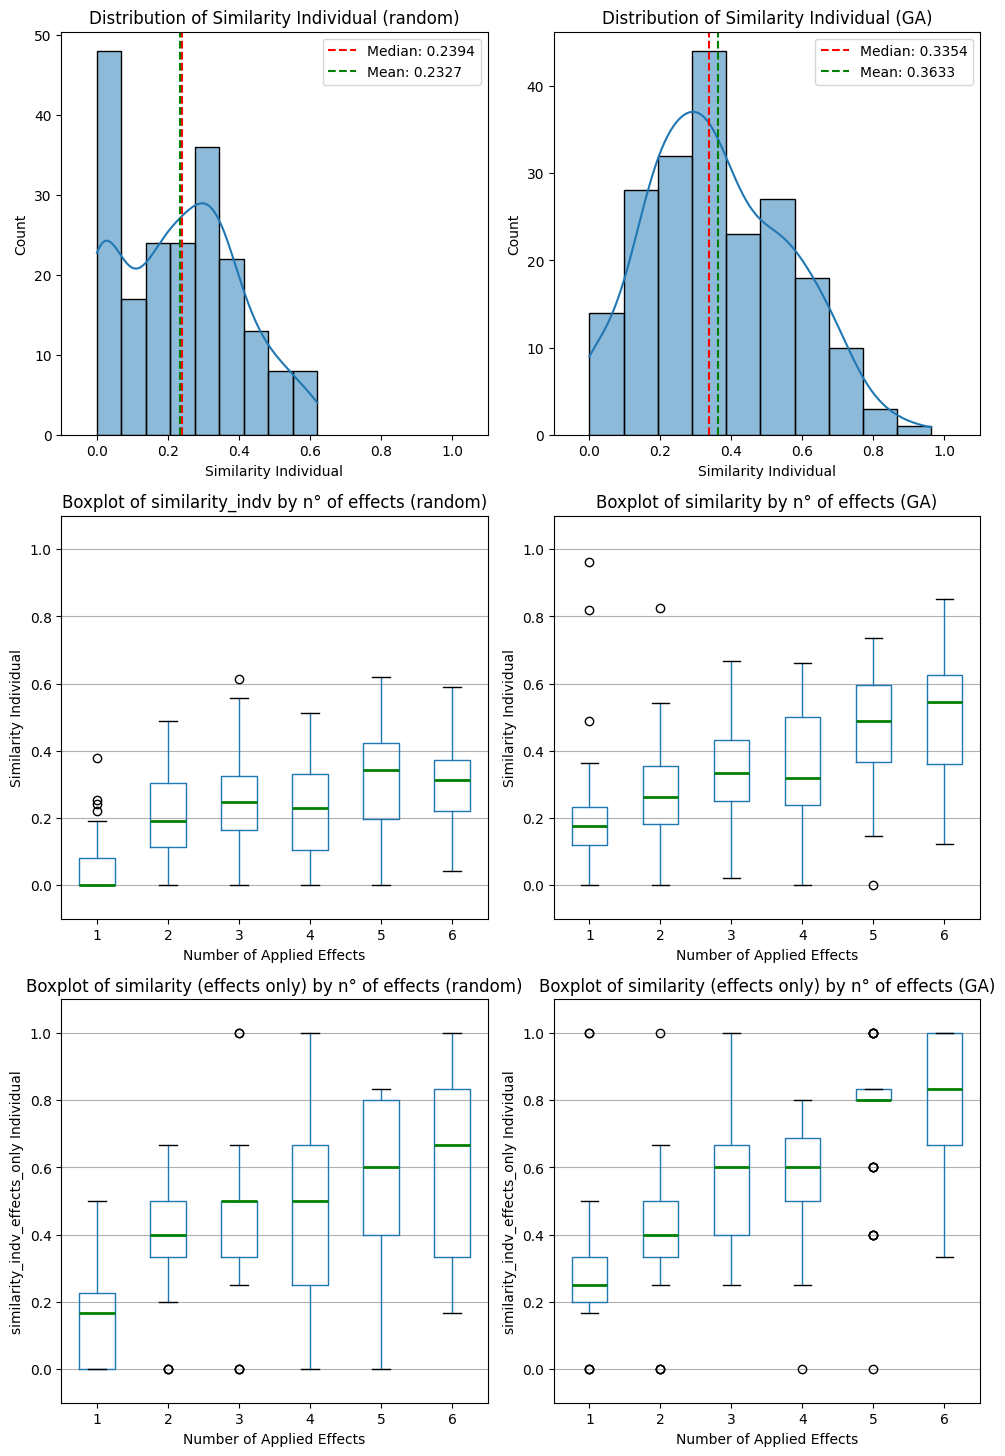

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Read the first CSV file
df_random = pd.read_csv('./results/dataset_audios_guitar_full_ranges_random.csv')

# Convert similarity_indv to numeric type
df_random['similarity_indv'] = pd.to_numeric(df_random['similarity_indv'], errors='coerce')

median_random = df_random['similarity_indv'].median()
mean_random = df_random['similarity_indv'].mean()

# Read the second CSV file
df_ga = pd.read_csv('./results/dataset_audios_guitar_full_ranges.csv')

# Convert similarity_indv to numeric type
df_ga['similarity_indv'] = pd.to_numeric(df_ga['similarity_indv'], errors='coerce')

median_ga = df_ga['similarity_indv'].median()
mean_ga = df_ga['similarity_indv'].mean()

# Function to count items in the applied_effects dictionary
def count_effects(effects_str):
    effects_dict = ast.literal_eval(effects_str)
    return len(effects_dict)

# Count items in applied_effects for both dataframes
df_random['effects_count'] = df_random['applied_effects'].apply(count_effects)
df_ga['effects_count'] = df_ga['applied_effects'].apply(count_effects)

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Plot 1: Histogram of similarity_indv (random effects)
sns.histplot(df_random['similarity_indv'], kde=True, ax=axes[0, 0])
axes[0, 0].axvline(median_random, color='r', linestyle='--', label=f'Median: {median_random:.4f}')
axes[0, 0].axvline(mean_random, color='g', linestyle='--', label=f'Mean: {mean_random:.4f}')
axes[0, 0].set_title('Distribution of Similarity Individual (random)')
axes[0, 0].set_xlabel('Similarity Individual')
axes[0, 0].set_xlim(-0.1, 1.1)
axes[0, 0].legend()

# Plot 2: Histogram of similarity_indv (GA effects)
sns.histplot(df_ga['similarity_indv'], kde=True, ax=axes[0, 1])
axes[0, 1].axvline(median_ga, color='r', linestyle='--', label=f'Median: {median_ga:.4f}')
axes[0, 1].axvline(mean_ga, color='g', linestyle='--', label=f'Mean: {mean_ga:.4f}')
axes[0, 1].set_title('Distribution of Similarity Individual (GA)')
axes[0, 1].set_xlabel('Similarity Individual')
axes[0, 1].set_xlim(-0.1, 1.1)
axes[0, 1].legend()

# Plot 3: Box plot of similarity_indv vs number of effects (random effects)
df_random.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, 0], medianprops={'color': 'green', 'linewidth': 2})
axes[1, 0].set_title('Boxplot of similarity_indv by n° of effects (random)')
axes[1, 0].set_xlabel('Number of Applied Effects')
axes[1, 0].set_ylabel('Similarity Individual')
axes[1, 0].set_ylim(-0.1, 1.1)
axes[1, 0].grid(True, axis='y')

# Plot 4: Box plot of similarity_indv vs number of effects (GA effects)
df_ga.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, 1], medianprops={'color': 'green', 'linewidth': 2})
axes[1, 1].set_title('Boxplot of similarity by n° of effects (GA)')
axes[1, 1].set_xlabel('Number of Applied Effects')
axes[1, 1].set_ylabel('Similarity Individual')
axes[1, 1].set_ylim(-0.1, 1.1)
axes[1, 1].grid(True, axis='y')

# Plot 5: Box plot of similarity_indv vs number of effects (random effects) (effects only)
df_random.boxplot(column="similarity_indv_effects_only", by="effects_count", grid=False, showfliers=True, ax=axes[2, 0], medianprops={'color': 'green', 'linewidth': 2})
axes[2, 0].set_title('Boxplot of similarity (effects only) by n° of effects (random)')
axes[2, 0].set_xlabel('Number of Applied Effects')
axes[2, 0].set_ylabel('similarity_indv_effects_only Individual')
axes[2, 0].set_ylim(-0.1, 1.1)
axes[2, 0].grid(True, axis='y')

# Plot 6: Box plot of similarity_indv vs number of effects (GA effects) (effects only)
df_ga.boxplot(column="similarity_indv_effects_only", by="effects_count", grid=False, showfliers=True, ax=axes[2, 1], medianprops={'color': 'green', 'linewidth': 2})
axes[2, 1].set_title('Boxplot of similarity (effects only) by n° of effects (GA)')
axes[2, 1].set_xlabel('Number of Applied Effects')
axes[2, 1].set_ylabel('similarity_indv_effects_only Individual')
axes[2, 1].set_ylim(-0.1, 1.1)
axes[2, 1].grid(True, axis='y')

# Adjust layout to prevent clipping and overlapping
plt.tight_layout()
plt.suptitle('')

# Show the combined plot
plt.show()


## Graphs for tests (low ranges)

effect_structure = {<br>
    0: { "rate_hz": ('float', (1.0, 20.0)), },# Chorus<br>
    1: { "delay_seconds": ('float', (1.0, 5.0)), },# Delay<br>
    2: { "drive_db": ('float', (1.0, 20.0)), },# Distortion<br>
    3: { "gain_db": ('float', (-10.0, 10.0)) },# Gain<br>
    4: { "depth": ('float', (0.2, 0.6)), },# Phaser<br>
    5: { "wet_level": ('float', (0.2, 0.6)), },# Reverb<br>
}


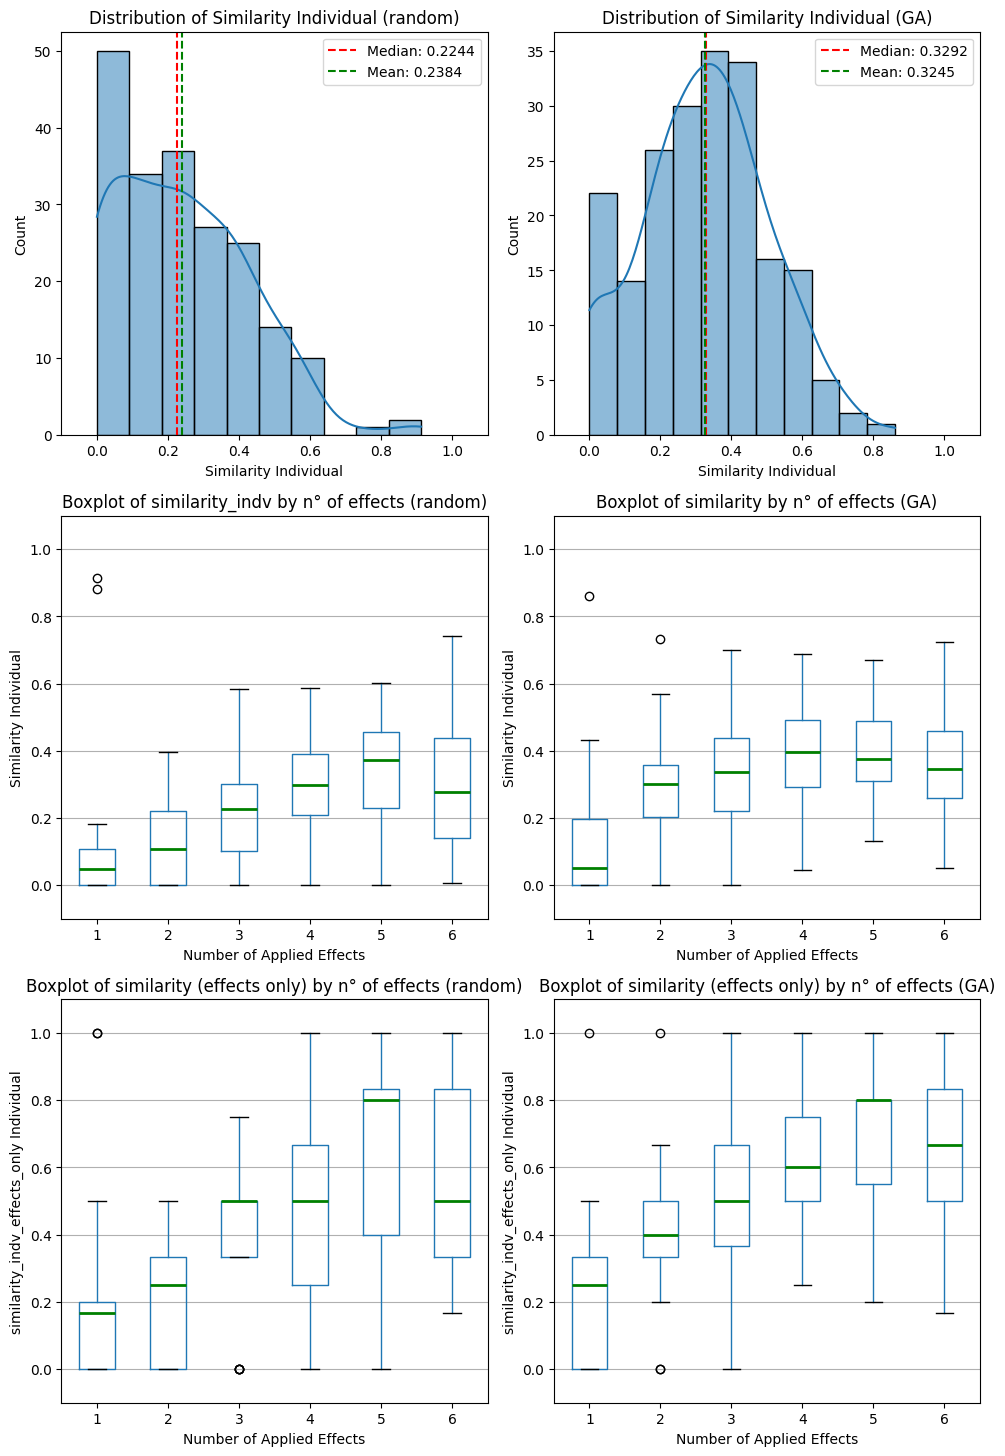

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Read the first CSV file
df_random = pd.read_csv('./results/dataset_audios_guitar_low_ranges_random.csv')

# Convert similarity_indv to numeric type
df_random['similarity_indv'] = pd.to_numeric(df_random['similarity_indv'], errors='coerce')

median_random = df_random['similarity_indv'].median()
mean_random = df_random['similarity_indv'].mean()

# Read the second CSV file
df_ga = pd.read_csv('./results/dataset_audios_guitar_low_ranges.csv')

# Convert similarity_indv to numeric type
df_ga['similarity_indv'] = pd.to_numeric(df_ga['similarity_indv'], errors='coerce')

median_ga = df_ga['similarity_indv'].median()
mean_ga = df_ga['similarity_indv'].mean()

# Function to count items in the applied_effects dictionary
def count_effects(effects_str):
    effects_dict = ast.literal_eval(effects_str)
    return len(effects_dict)

# Count items in applied_effects for both dataframes
df_random['effects_count'] = df_random['applied_effects'].apply(count_effects)
df_ga['effects_count'] = df_ga['applied_effects'].apply(count_effects)

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Plot 1: Histogram of similarity_indv (random effects)
sns.histplot(df_random['similarity_indv'], kde=True, ax=axes[0, 0])
axes[0, 0].axvline(median_random, color='r', linestyle='--', label=f'Median: {median_random:.4f}')
axes[0, 0].axvline(mean_random, color='g', linestyle='--', label=f'Mean: {mean_random:.4f}')
axes[0, 0].set_title('Distribution of Similarity Individual (random)')
axes[0, 0].set_xlabel('Similarity Individual')
axes[0, 0].set_xlim(-0.1, 1.1)
axes[0, 0].legend()

# Plot 2: Histogram of similarity_indv (GA effects)
sns.histplot(df_ga['similarity_indv'], kde=True, ax=axes[0, 1])
axes[0, 1].axvline(median_ga, color='r', linestyle='--', label=f'Median: {median_ga:.4f}')
axes[0, 1].axvline(mean_ga, color='g', linestyle='--', label=f'Mean: {mean_ga:.4f}')
axes[0, 1].set_title('Distribution of Similarity Individual (GA)')
axes[0, 1].set_xlabel('Similarity Individual')
axes[0, 1].set_xlim(-0.1, 1.1)
axes[0, 1].legend()

# Plot 3: Box plot of similarity_indv vs number of effects (random effects)
df_random.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, 0], medianprops={'color': 'green', 'linewidth': 2})
axes[1, 0].set_title('Boxplot of similarity_indv by n° of effects (random)')
axes[1, 0].set_xlabel('Number of Applied Effects')
axes[1, 0].set_ylabel('Similarity Individual')
axes[1, 0].set_ylim(-0.1, 1.1)
axes[1, 0].grid(True, axis='y')

# Plot 4: Box plot of similarity_indv vs number of effects (GA effects)
df_ga.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, 1], medianprops={'color': 'green', 'linewidth': 2})
axes[1, 1].set_title('Boxplot of similarity by n° of effects (GA)')
axes[1, 1].set_xlabel('Number of Applied Effects')
axes[1, 1].set_ylabel('Similarity Individual')
axes[1, 1].set_ylim(-0.1, 1.1)
axes[1, 1].grid(True, axis='y')

# Plot 5: Box plot of similarity_indv vs number of effects (random effects) (effects only)
df_random.boxplot(column="similarity_indv_effects_only", by="effects_count", grid=False, showfliers=True, ax=axes[2, 0], medianprops={'color': 'green', 'linewidth': 2})
axes[2, 0].set_title('Boxplot of similarity (effects only) by n° of effects (random)')
axes[2, 0].set_xlabel('Number of Applied Effects')
axes[2, 0].set_ylabel('similarity_indv_effects_only Individual')
axes[2, 0].set_ylim(-0.1, 1.1)
axes[2, 0].grid(True, axis='y')

# Plot 6: Box plot of similarity_indv vs number of effects (GA effects) (effects only)
df_ga.boxplot(column="similarity_indv_effects_only", by="effects_count", grid=False, showfliers=True, ax=axes[2, 1], medianprops={'color': 'green', 'linewidth': 2})
axes[2, 1].set_title('Boxplot of similarity (effects only) by n° of effects (GA)')
axes[2, 1].set_xlabel('Number of Applied Effects')
axes[2, 1].set_ylabel('similarity_indv_effects_only Individual')
axes[2, 1].set_ylim(-0.1, 1.1)
axes[2, 1].grid(True, axis='y')

# Adjust layout to prevent clipping and overlapping
plt.tight_layout()
plt.suptitle('')

# Show the combined plot
plt.show()


## Graphs one effect tested

settings: <br>
onset_threshold = 0.5 <br>
frame_threshold = 0.3<br>
threshold = 2.2<br>
fan_out = 25<br>
max_distance_atan = 50<br> 
max_key_distance = 50 <br>

instrument_program = 30 #guitar 30, violin 40<br>
constellation_map_alg = z_score_peaks_calculation<br>
fitness = fitness_lines_difference_for_parallel_comp<br>

pop_size = 50<br>
p_mutation = 0.8<br>
p_crossover = 0.5<br>
p_pop_item = 0<br>
p_add_new_effect = 0<br>
n_iter = 2<br>
t_size = 2

<Figure size 800x600 with 0 Axes>

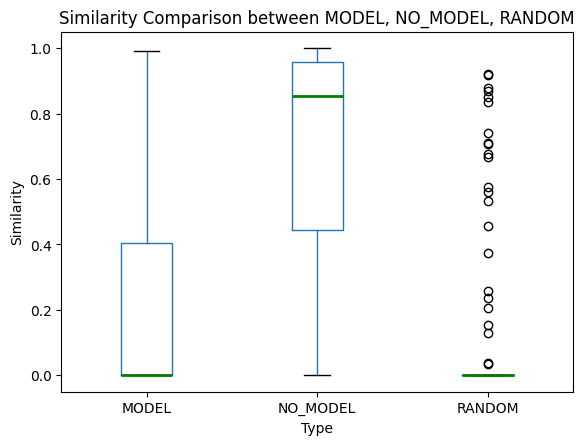

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('./results/dataset_audios_guitar_lowR_1effect.csv')

# Create a DataFrame with two columns for the boxplot: 'Similarity' and 'Type'
boxplot_data = pd.DataFrame({
    'Similarity': df['sim_MODEL'].tolist() + df['sim_NO_MODEL'].tolist() + df['sim_RANDOM'].tolist(),
    'Type': ['MODEL'] * len(df) + ['NO_MODEL'] * len(df) + ["RANDOM"] * len(df)
})

# Create the boxplot
plt.figure(figsize=(8, 6))
boxplot_data.boxplot(by='Type', column='Similarity', grid=False, showfliers=True, medianprops={'color': 'green', 'linewidth': 2})
plt.title('Similarity Comparison between MODEL, NO_MODEL, RANDOM')
plt.suptitle('')  # Remove the automatic title
plt.xlabel('Type')
plt.ylabel('Similarity')
plt.show()


## Graphs test without MODEL part 

original midi is used instead of the model generated midi

## Random + random search + GA + GA aggr mut + GA spectr fit + GA_150_25_3 graphs

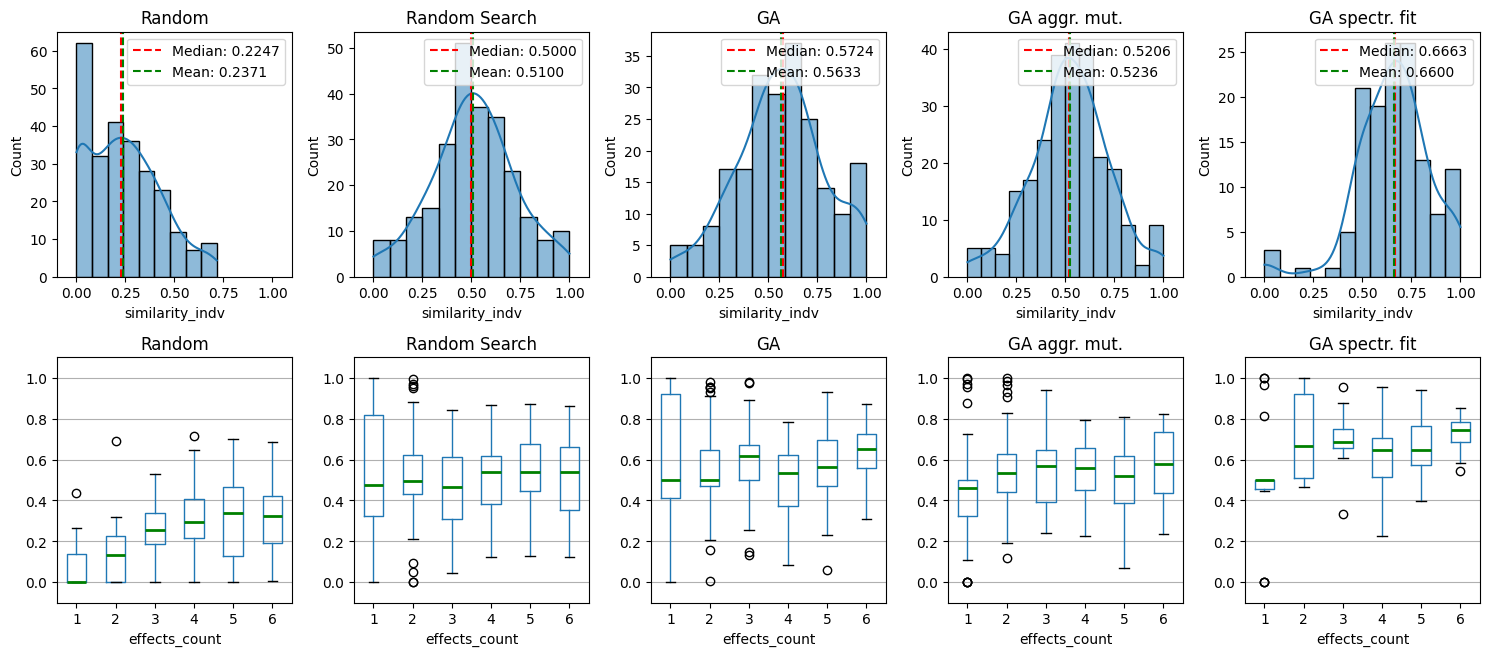

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Read the first CSV file
df_random_S = pd.read_csv('./results/dataset_audios_guitar_low_ranges_w_clean_random_search.csv')

# Convert similarity_indv to numeric type
df_random_S['similarity_indv'] = pd.to_numeric(df_random_S['similarity_indv'], errors='coerce')

median_random_S = df_random_S['similarity_indv'].median()
mean_random_S = df_random_S['similarity_indv'].mean()

# Read the first CSV file
df_random = pd.read_csv('./results/dataset_audios_guitar_low_ranges_w_clean_random.csv')

# Convert similarity_indv to numeric type
df_random['similarity_indv'] = pd.to_numeric(df_random['similarity_indv'], errors='coerce')

median_random = df_random['similarity_indv'].median()
mean_random = df_random['similarity_indv'].mean()

# Read the second CSV file
df_ga = pd.read_csv('./results/dataset_audios_guitar_low_ranges_w_clean.csv')

# Convert similarity_indv to numeric type
df_ga['similarity_indv'] = pd.to_numeric(df_ga['similarity_indv'], errors='coerce')

median_ga = df_ga['similarity_indv'].median()
mean_ga = df_ga['similarity_indv'].mean()

df_ga_aggr = pd.read_csv('./results/dataset_audios_guitar_low_ranges_w_clean_aggr_mut.csv')

# Convert similarity_indv to numeric type
df_ga_aggr['similarity_indv'] = pd.to_numeric(df_ga_aggr['similarity_indv'], errors='coerce')

median_ga_aggr = df_ga_aggr['similarity_indv'].median()
mean_ga_aggr = df_ga_aggr['similarity_indv'].mean()

df_spectr_fit = pd.read_csv('./results/dataset_audios_guitar_low_ranges_w_clean_spectr_fit.csv')

# Convert similarity_indv to numeric type
df_spectr_fit['similarity_indv'] = pd.to_numeric(df_spectr_fit['similarity_indv'], errors='coerce')

median_spectr_fit = df_spectr_fit['similarity_indv'].median()
mean_spectr_fit = df_spectr_fit['similarity_indv'].mean()

def count_effects(effects_str):
    effects_dict = ast.literal_eval(effects_str)
    return len(effects_dict)

# Count items in applied_effects for both dataframes
df_random['effects_count'] = df_random['applied_effects'].apply(count_effects)
df_random_S['effects_count'] = df_random_S['applied_effects'].apply(count_effects)
df_ga['effects_count'] = df_ga['applied_effects'].apply(count_effects)
df_ga_aggr['effects_count'] = df_ga_aggr['applied_effects'].apply(count_effects)
df_spectr_fit['effects_count'] = df_spectr_fit['applied_effects'].apply(count_effects)

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# Plot 1: Histogram of similarity_indv (random effects)
sns.histplot(df_random['similarity_indv'], kde=True, ax=axes[0, 0])
axes[0, 0].axvline(median_random, color='r', linestyle='--', label=f'Median: {median_random:.4f}')
axes[0, 0].axvline(mean_random, color='g', linestyle='--', label=f'Mean: {mean_random:.4f}')
axes[0, 0].set_title('Random')
axes[0, 0].set_xlim(-0.1, 1.1)
axes[0, 0].legend(loc=1)

# Plot 2: Histogram of similarity_indv (GA effects)
sns.histplot(df_random_S['similarity_indv'], kde=True, ax=axes[0, 1])
axes[0, 1].axvline(median_random_S, color='r', linestyle='--', label=f'Median: {median_random_S:.4f}')
axes[0, 1].axvline(mean_random_S, color='g', linestyle='--', label=f'Mean: {mean_random_S:.4f}')
axes[0, 1].set_title('Random Search')
axes[0, 1].set_xlim(-0.1, 1.1)
axes[0, 1].legend(loc=1)

# Plot 2: Histogram of similarity_indv (GA effects)
sns.histplot(df_ga['similarity_indv'], kde=True, ax=axes[0, 2])
axes[0, 2].axvline(median_ga, color='r', linestyle='--', label=f'Median: {median_ga:.4f}')
axes[0, 2].axvline(mean_ga, color='g', linestyle='--', label=f'Mean: {mean_ga:.4f}')
axes[0, 2].set_title('GA')
axes[0, 2].set_xlim(-0.1, 1.1)
axes[0, 2].legend(loc=1)

# Plot 2: Histogram of similarity_indv (GA effects)
sns.histplot(df_ga_aggr['similarity_indv'], kde=True, ax=axes[0, 3])
axes[0, 3].axvline(median_ga_aggr, color='r', linestyle='--', label=f'Median: {median_ga_aggr:.4f}')
axes[0, 3].axvline(mean_ga_aggr, color='g', linestyle='--', label=f'Mean: {mean_ga_aggr:.4f}')
axes[0, 3].set_title('GA aggr. mut.')
axes[0, 3].set_xlim(-0.1, 1.1)
axes[0, 3].legend(loc=1)

sns.histplot(df_spectr_fit['similarity_indv'], kde=True, ax=axes[0, 4])
axes[0, 4].axvline(median_spectr_fit, color='r', linestyle='--', label=f'Median: {median_spectr_fit:.4f}')
axes[0, 4].axvline(mean_spectr_fit, color='g', linestyle='--', label=f'Mean: {mean_spectr_fit:.4f}')
axes[0, 4].set_title('GA spectr. fit')
axes[0, 4].set_xlim(-0.1, 1.1)
axes[0, 4].legend(loc=1)

# Plot 3: Box plot of similarity_indv vs number of effects (random effects)
df_random.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, 0], medianprops={'color': 'green', 'linewidth': 2})
axes[1, 0].set_title('Random')
axes[1, 0].set_ylim(-0.1, 1.1)
axes[1, 0].grid(True, axis='y')

# Plot 4: Box plot of similarity_indv vs number of effects (GA effects)
df_random_S.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, 1], medianprops={'color': 'green', 'linewidth': 2})
axes[1, 1].set_title('Random Search')
axes[1, 1].set_ylim(-0.1, 1.1)
axes[1, 1].grid(True, axis='y')

# Plot 4: Box plot of similarity_indv vs number of effects (GA effects)
df_ga.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, 2], medianprops={'color': 'green', 'linewidth': 2})
axes[1, 2].set_title('GA')
axes[1, 2].set_ylim(-0.1, 1.1)
axes[1, 2].grid(True, axis='y')

# Plot 4: Box plot of similarity_indv vs number of effects (GA effects)
df_ga_aggr.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, 3], medianprops={'color': 'green', 'linewidth': 2})
axes[1, 3].set_title('GA aggr. mut.')
axes[1, 3].set_ylim(-0.1, 1.1)
axes[1, 3].grid(True, axis='y')

df_spectr_fit.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, 4], medianprops={'color': 'green', 'linewidth': 2})
axes[1, 4].set_title('GA spectr. fit')
axes[1, 4].set_ylim(-0.1, 1.1)
axes[1, 4].grid(True, axis='y')

# Adjust layout to prevent clipping and overlapping
plt.tight_layout()
plt.suptitle('')

# Show the combined plot
plt.show()


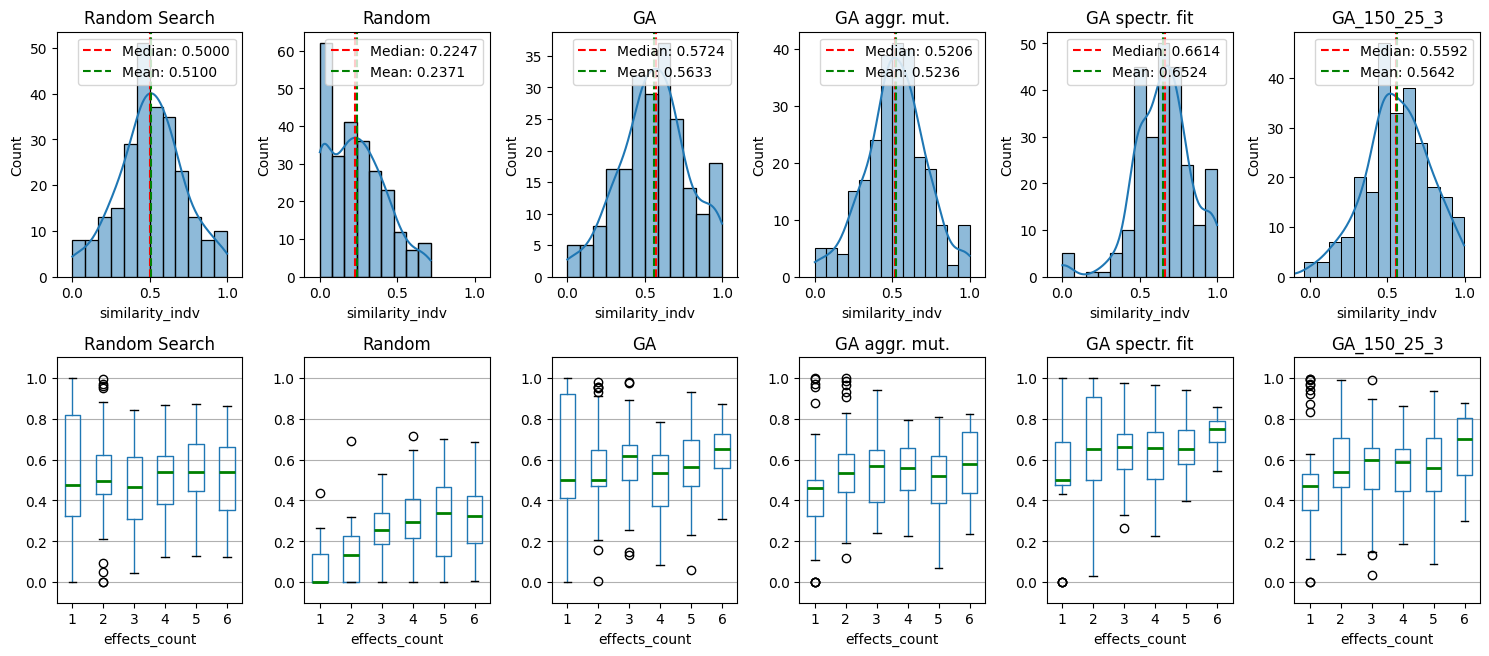

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# List of file paths and titles for the datasets
datasets = [
    ('./results/dataset_audios_guitar_low_ranges_w_clean_random_search.csv', 'Random Search'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean_random.csv', 'Random'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean.csv', 'GA'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean_aggr_mut.csv', 'GA aggr. mut.'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean_spectr_fit.csv', 'GA spectr. fit'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean_150_25_3.csv', 'GA_150_25_3')
]

# Function to load data and process 'similarity_indv' column
def load_and_process_data(file_path):
    df = pd.read_csv(file_path)
    df['similarity_indv'] = pd.to_numeric(df['similarity_indv'], errors='coerce')
    return df, df['similarity_indv'].median(), df['similarity_indv'].mean()

# Load all datasets
dataframes = []
for file_path, title in datasets:
    df, median, mean = load_and_process_data(file_path)
    df['effects_count'] = df['applied_effects'].apply(lambda x: len(ast.literal_eval(x)))
    dataframes.append((df, median, mean, title))

# Create a 2x5 grid for the plots
fig, axes = plt.subplots(2, 6, figsize=(15, 7))

# Plot histograms and boxplots for each dataset
for i, (df, median, mean, title) in enumerate(dataframes):
    # Histogram of 'similarity_indv'
    sns.histplot(df['similarity_indv'], kde=True, ax=axes[0, i])
    axes[0, i].axvline(median, color='r', linestyle='--', label=f'Median: {median:.4f}')
    axes[0, i].axvline(mean, color='g', linestyle='--', label=f'Mean: {mean:.4f}')
    axes[0, i].set_title(title)
    axes[0, i].set_xlim(-0.1, 1.1)
    axes[0, i].legend(loc=1)

    # Box plot of 'similarity_indv' vs. 'effects_count'
    df.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, i], 
               medianprops={'color': 'green', 'linewidth': 2})
    axes[1, i].set_title(title)
    axes[1, i].set_ylim(-0.1, 1.1)
    axes[1, i].grid(True, axis='y')

# Adjust layout to prevent clipping and overlapping
plt.tight_layout()
plt.suptitle('')

# Show the combined plot
plt.show()


## Random + random search + GA + GA aggr mut + GA spectr fit + GA_150_25_3 graphs (NEW DISS)

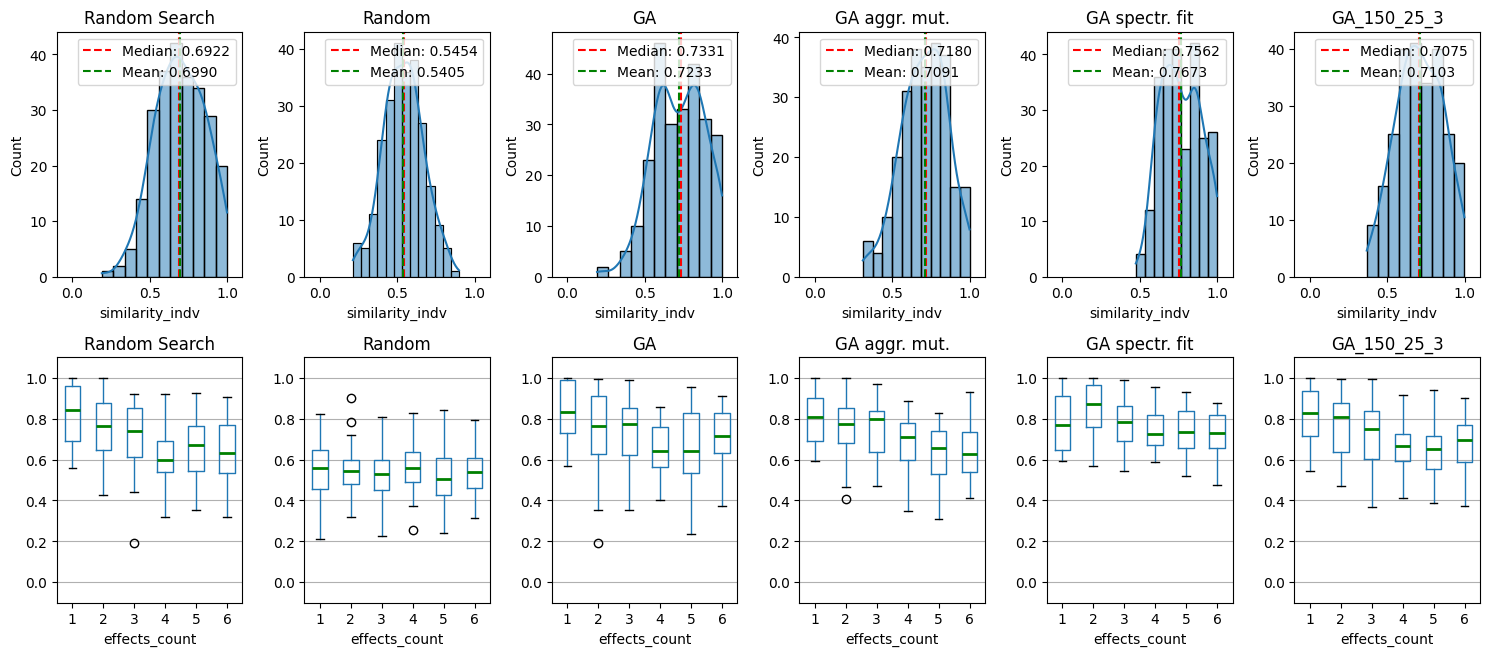

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# List of file paths and titles for the datasets
datasets = [
    ('./results/dataset_audios_guitar_low_ranges_w_clean_random_search_new_diss.csv', 'Random Search'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean_random_new_diss.csv', 'Random'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean_new_diss.csv', 'GA'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean_aggr_mut_new_diss.csv', 'GA aggr. mut.'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean_spectr_fit_new_diss.csv', 'GA spectr. fit'),
    ('./results/dataset_audios_guitar_low_ranges_w_clean_150_25_3_new_diss.csv', 'GA_150_25_3')
]

# Function to load data and process 'similarity_indv' column
def load_and_process_data(file_path):
    df = pd.read_csv(file_path)
    df['similarity_indv'] = pd.to_numeric(df['similarity_indv'], errors='coerce')
    return df, df['similarity_indv'].median(), df['similarity_indv'].mean()

# Load all datasets
dataframes = []
for file_path, title in datasets:
    df, median, mean = load_and_process_data(file_path)
    df['effects_count'] = df['applied_effects'].apply(lambda x: len(ast.literal_eval(x)))
    dataframes.append((df, median, mean, title))

# Create a 2x5 grid for the plots
fig, axes = plt.subplots(2, 6, figsize=(15, 7))

# Plot histograms and boxplots for each dataset
for i, (df, median, mean, title) in enumerate(dataframes):
    # Histogram of 'similarity_indv'
    sns.histplot(df['similarity_indv'], kde=True, ax=axes[0, i])
    axes[0, i].axvline(median, color='r', linestyle='--', label=f'Median: {median:.4f}')
    axes[0, i].axvline(mean, color='g', linestyle='--', label=f'Mean: {mean:.4f}')
    axes[0, i].set_title(title)
    axes[0, i].set_xlim(-0.1, 1.1)
    axes[0, i].legend(loc=1)

    # Box plot of 'similarity_indv' vs. 'effects_count'
    df.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, i], 
               medianprops={'color': 'green', 'linewidth': 2})
    axes[1, i].set_title(title)
    axes[1, i].set_ylim(-0.1, 1.1)
    axes[1, i].grid(True, axis='y')

# Adjust layout to prevent clipping and overlapping
plt.tight_layout()
plt.suptitle('')

# Show the combined plot
plt.show()


## Looking how GA performs through generations

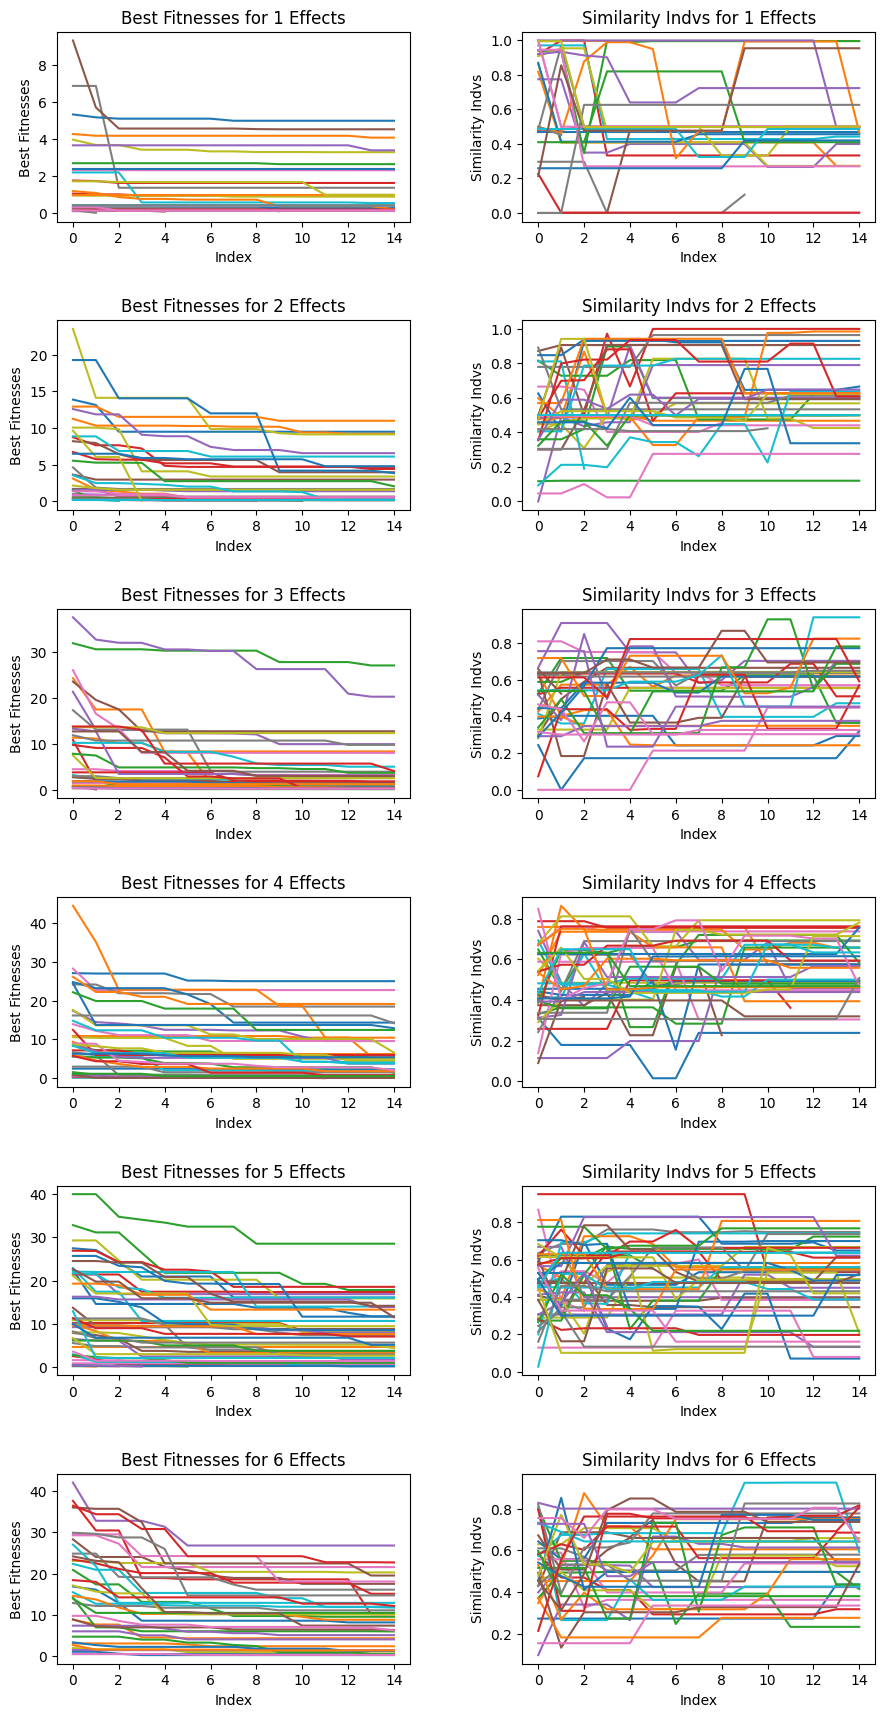

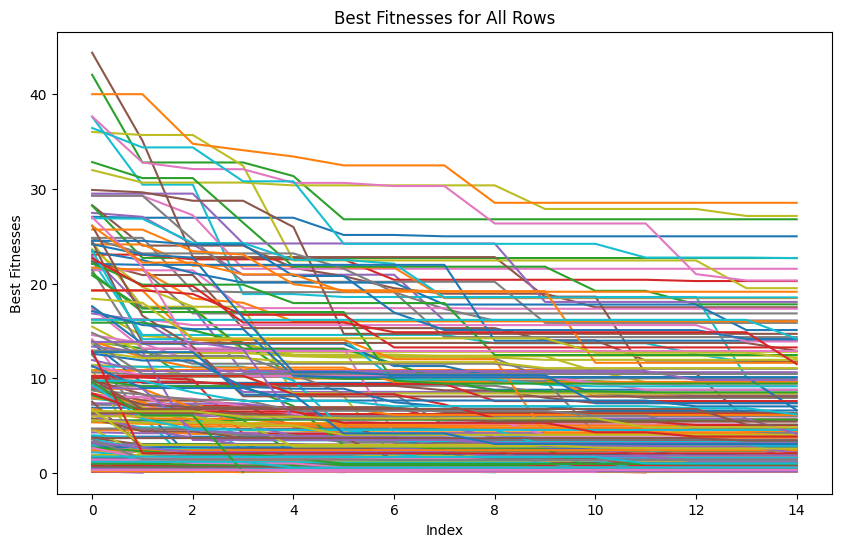

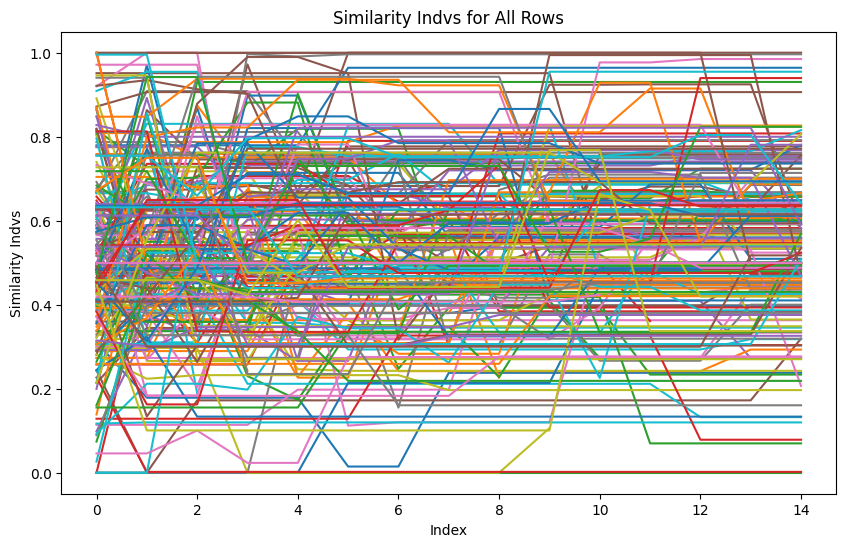

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load the CSV file
file_path = './results/dataset_audios_guitar_low_ranges_w_clean_aggr_mut.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Define function to count effects
def count_effects(effects_str):
    effects_dict = ast.literal_eval(effects_str)
    return len(effects_dict)

# Apply the function to count effects in "Applied_effects" column
df['num_effects'] = df['applied_effects'].apply(count_effects)

# Group the data by the number of effects
grouped = df.groupby('num_effects')

# Set up the figure for subplots
num_groups = len(grouped)
fig, axes = plt.subplots(num_groups, 2, figsize=(10, 3 * num_groups))
fig.tight_layout(pad=5.0)

# Plot for each group
for i, (num_effects, group) in enumerate(grouped):
    # Convert "best_fitnesses" and "similarity_indvs" to lists of floats
    group['best_fitnesses'] = group['best_fitnesses'].apply(lambda x: ast.literal_eval(x))
    group['similarity_indvs'] = group['similarity_indvs'].apply(lambda x: ast.literal_eval(x))

    # Plot "best_fitnesses" line plot for this group
    for idx, row in group.iterrows():
        axes[i, 0].plot(row['best_fitnesses'], label=f'Row {idx}')
    axes[i, 0].set_title(f'Best Fitnesses for {num_effects} Effects')
    axes[i, 0].set_xlabel('Index')
    axes[i, 0].set_ylabel('Best Fitnesses')
    #axes[i, 0].legend(fontsize='xx-small', loc='upper right')

    # Plot "similarity_indvs" line plot for this group
    for idx, row in group.iterrows():
        axes[i, 1].plot(row['similarity_indvs'], label=f'Row {idx}')
    axes[i, 1].set_title(f'Similarity Indvs for {num_effects} Effects')
    axes[i, 1].set_xlabel('Index')
    axes[i, 1].set_ylabel('Similarity Indvs')
    #axes[i, 1].legend(fontsize='xx-small', loc='upper right')

plt.show()

# Convert "best_fitnesses" and "similarity_indvs" columns to lists of floats
df['best_fitnesses'] = df['best_fitnesses'].apply(lambda x: ast.literal_eval(x))
df['similarity_indvs'] = df['similarity_indvs'].apply(lambda x: ast.literal_eval(x))

# Plot "best_fitnesses" for all rows
plt.figure(figsize=(10, 6))
for idx, row in df.iterrows():
    plt.plot(row['best_fitnesses'], label=f'Row {idx}')
plt.title('Best Fitnesses for All Rows')
plt.xlabel('Index')
plt.ylabel('Best Fitnesses')
plt.show()

# Plot "similarity_indvs" for all rows
plt.figure(figsize=(10, 6))
for idx, row in df.iterrows():
    plt.plot(row['similarity_indvs'], label=f'Row {idx}')
plt.title('Similarity Indvs for All Rows')
plt.xlabel('Index')
plt.ylabel('Similarity Indvs')
plt.show()

## Using the new diss

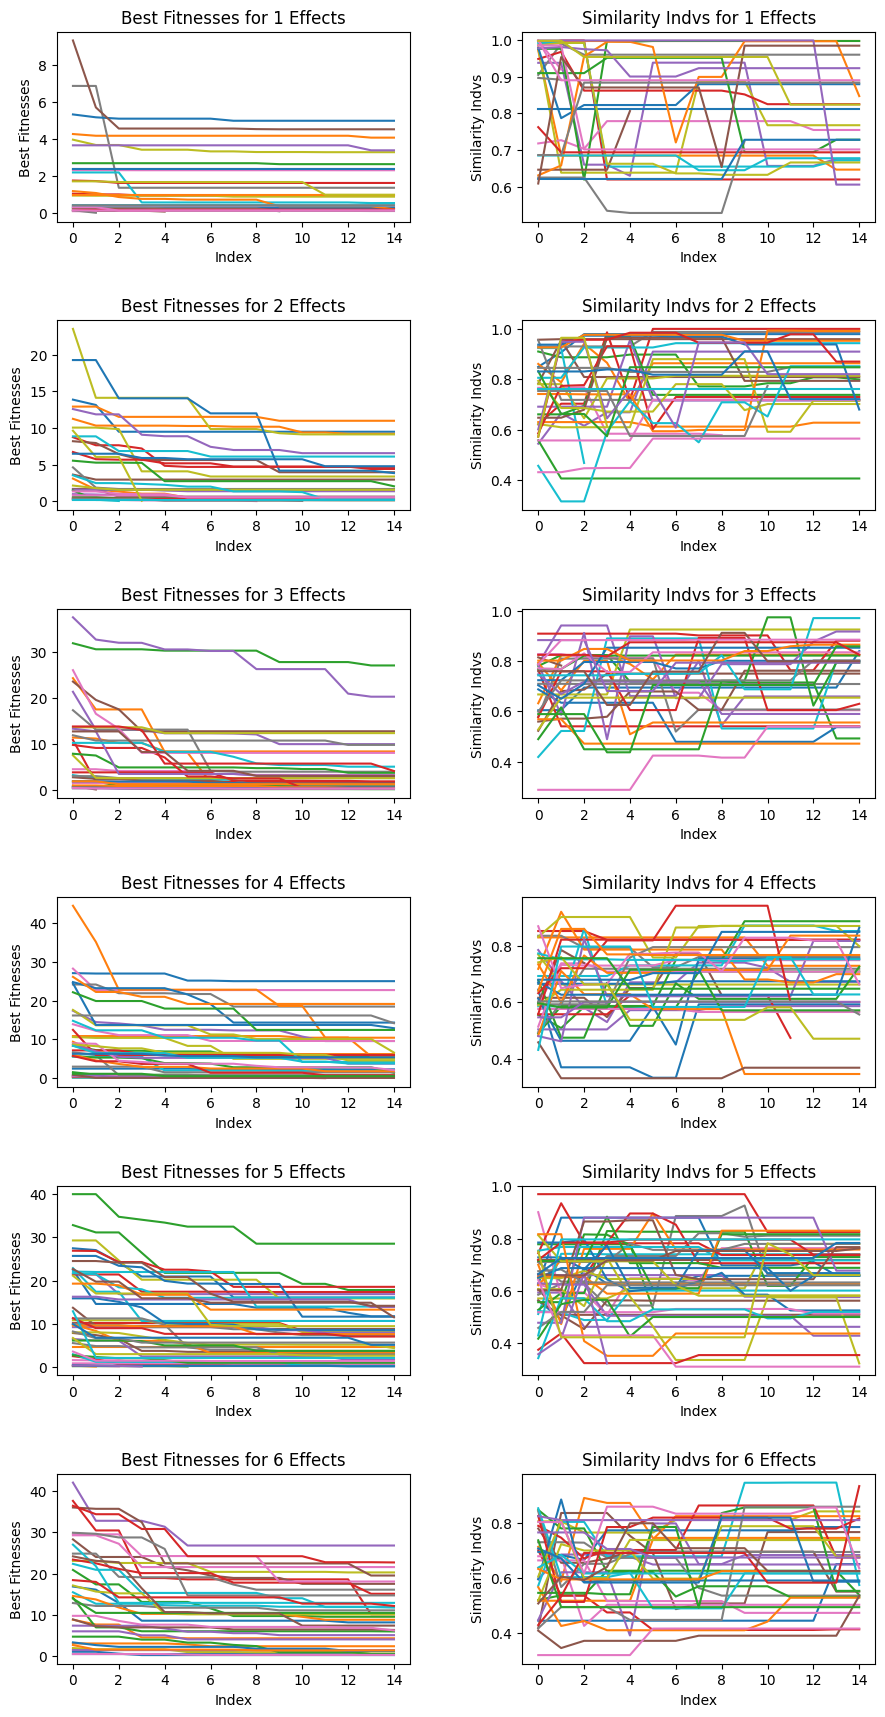

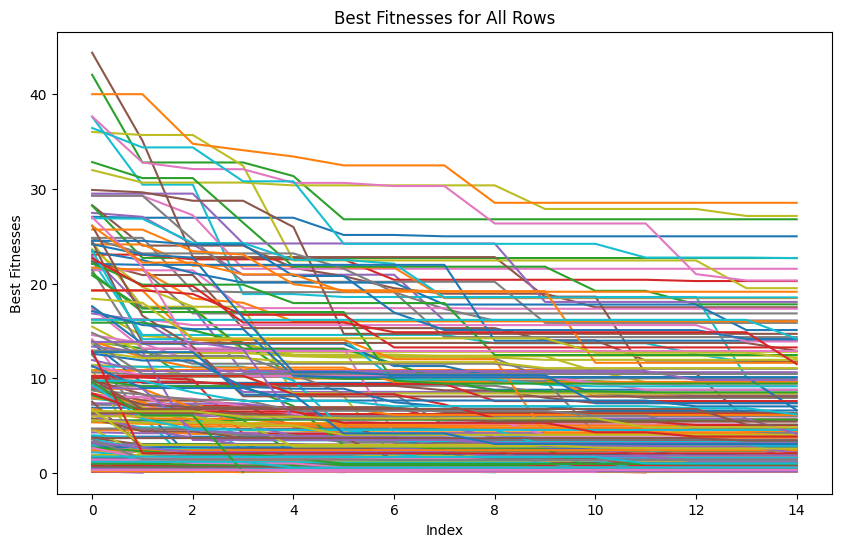

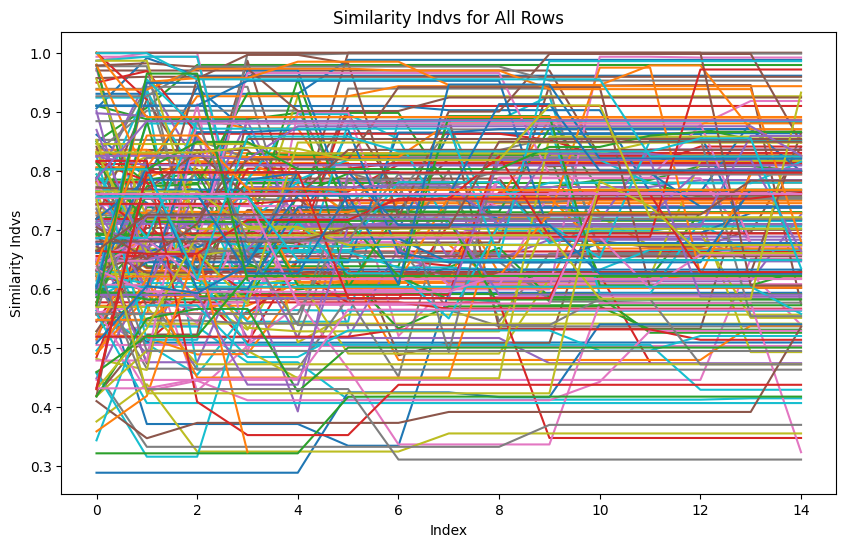

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load the CSV file
file_path = './results/dataset_audios_guitar_low_ranges_w_clean_aggr_mut_new_diss.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Define function to count effects
def count_effects(effects_str):
    effects_dict = ast.literal_eval(effects_str)
    return len(effects_dict)

# Apply the function to count effects in "Applied_effects" column
df['num_effects'] = df['applied_effects'].apply(count_effects)

# Group the data by the number of effects
grouped = df.groupby('num_effects')

# Set up the figure for subplots
num_groups = len(grouped)
fig, axes = plt.subplots(num_groups, 2, figsize=(10, 3 * num_groups))
fig.tight_layout(pad=5.0)

# Plot for each group
for i, (num_effects, group) in enumerate(grouped):
    # Convert "best_fitnesses" and "similarity_indvs" to lists of floats
    group['best_fitnesses'] = group['best_fitnesses'].apply(lambda x: ast.literal_eval(x))
    group['similarity_indvs'] = group['similarity_indvs'].apply(lambda x: ast.literal_eval(x))

    # Plot "best_fitnesses" line plot for this group
    for idx, row in group.iterrows():
        axes[i, 0].plot(row['best_fitnesses'], label=f'Row {idx}')
    axes[i, 0].set_title(f'Best Fitnesses for {num_effects} Effects')
    axes[i, 0].set_xlabel('Index')
    axes[i, 0].set_ylabel('Best Fitnesses')
    #axes[i, 0].legend(fontsize='xx-small', loc='upper right')

    # Plot "similarity_indvs" line plot for this group
    for idx, row in group.iterrows():
        axes[i, 1].plot(row['similarity_indvs'], label=f'Row {idx}')
    axes[i, 1].set_title(f'Similarity Indvs for {num_effects} Effects')
    axes[i, 1].set_xlabel('Index')
    axes[i, 1].set_ylabel('Similarity Indvs')
    #axes[i, 1].legend(fontsize='xx-small', loc='upper right')

plt.show()

# Convert "best_fitnesses" and "similarity_indvs" columns to lists of floats
df['best_fitnesses'] = df['best_fitnesses'].apply(lambda x: ast.literal_eval(x))
df['similarity_indvs'] = df['similarity_indvs'].apply(lambda x: ast.literal_eval(x))

# Plot "best_fitnesses" for all rows
plt.figure(figsize=(10, 6))
for idx, row in df.iterrows():
    plt.plot(row['best_fitnesses'], label=f'Row {idx}')
plt.title('Best Fitnesses for All Rows')
plt.xlabel('Index')
plt.ylabel('Best Fitnesses')
plt.show()

# Plot "similarity_indvs" for all rows
plt.figure(figsize=(10, 6))
for idx, row in df.iterrows():
    plt.plot(row['similarity_indvs'], label=f'Row {idx}')
plt.title('Similarity Indvs for All Rows')
plt.xlabel('Index')
plt.ylabel('Similarity Indvs')
plt.show()

# Spectrogram fitness

## Using first sim

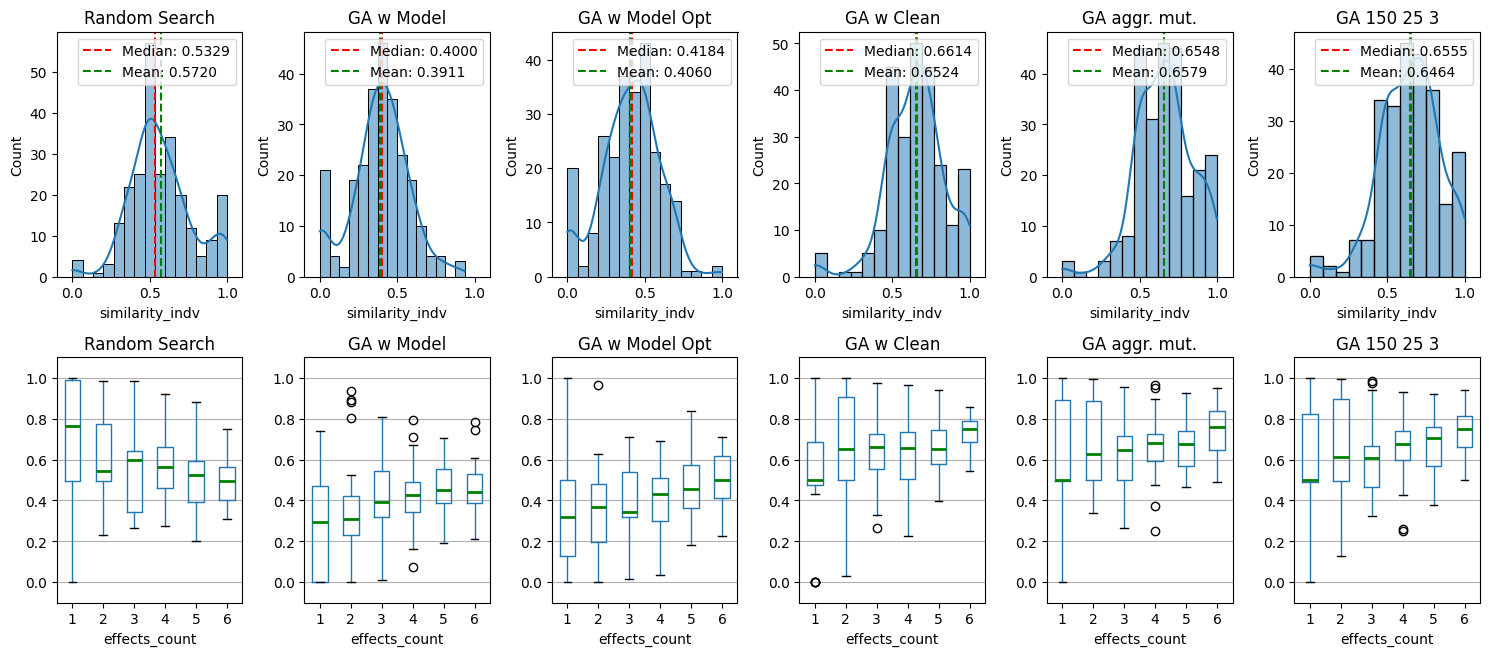

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# List of file paths and titles for the datasets
datasets = [
    ('./results/spectr_comp_fitness/first_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_spectr_fit_random_search.csv', 'Random Search'),
    ('./results/spectr_comp_fitness/first_sim/w_model/dataset_audios_guitar_low_ranges_w_model_spectr_fit.csv', 'GA w Model'),
    ('./results/spectr_comp_fitness/first_sim/w_model/dataset_audios_guitar_low_ranges_w_model_spectr_fit_opt_model_params.csv', 'GA w Model Opt'),
    ('./results/spectr_comp_fitness/first_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_spectr_fit.csv', 'GA w Clean'),
    ('./results/spectr_comp_fitness/first_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_spectr_fit_aggr_mut.csv', 'GA aggr. mut.'),
    ('./results/spectr_comp_fitness/first_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_spectr_fit_150_25_3.csv', 'GA 150 25 3')
]

# Function to load data and process 'similarity_indv' column
def load_and_process_data(file_path):
    df = pd.read_csv(file_path)
    df['similarity_indv'] = pd.to_numeric(df['similarity_indv'], errors='coerce')
    return df, df['similarity_indv'].median(), df['similarity_indv'].mean()

# Load all datasets
dataframes = []
for file_path, title in datasets:
    df, median, mean = load_and_process_data(file_path)
    df['effects_count'] = df['applied_effects'].apply(lambda x: len(ast.literal_eval(x)))
    dataframes.append((df, median, mean, title))

# Create a 2x5 grid for the plots
fig, axes = plt.subplots(2, 6, figsize=(15, 7))

# Plot histograms and boxplots for each dataset
for i, (df, median, mean, title) in enumerate(dataframes):
    # Histogram of 'similarity_indv'
    sns.histplot(df['similarity_indv'], kde=True, ax=axes[0, i])
    axes[0, i].axvline(median, color='r', linestyle='--', label=f'Median: {median:.4f}')
    axes[0, i].axvline(mean, color='g', linestyle='--', label=f'Mean: {mean:.4f}')
    axes[0, i].set_title(title)
    axes[0, i].set_xlim(-0.1, 1.1)
    axes[0, i].legend(loc=1)

    # Box plot of 'similarity_indv' vs. 'effects_count'
    df.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, i], 
               medianprops={'color': 'green', 'linewidth': 2})
    axes[1, i].set_title(title)
    axes[1, i].set_ylim(-0.1, 1.1)
    axes[1, i].grid(True, axis='y')

# Adjust layout to prevent clipping and overlapping
plt.tight_layout()
plt.suptitle('')

# Show the combined plot
plt.show()


## Using second sim

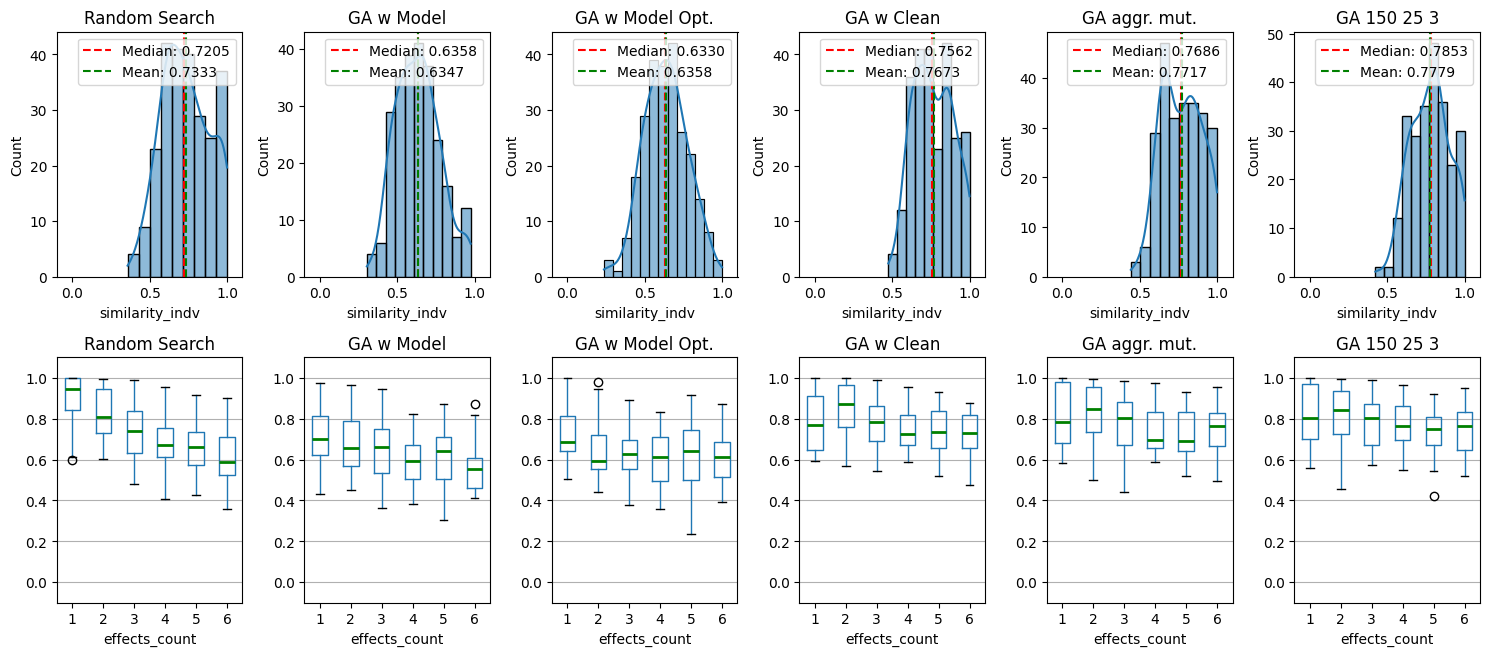

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# List of file paths and titles for the datasets
datasets = [
    ('./results/spectr_comp_fitness/gigi_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_spectr_fit_random_search_new_diss.csv', 'Random Search'),
    ('./results/spectr_comp_fitness/gigi_sim/w_model/dataset_audios_guitar_low_ranges_w_model_spectr_fit_new_diss.csv', 'GA w Model'),
    ('./results/spectr_comp_fitness/gigi_sim/w_model/dataset_audios_guitar_low_ranges_w_model_spectr_fit_opt_model_params_new_diss.csv', 'GA w Model Opt.'),
    ('./results/spectr_comp_fitness/gigi_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_spectr_fit_new_diss.csv', 'GA w Clean'),
    ('./results/spectr_comp_fitness/gigi_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_spectr_fit_aggr_mut_new_diss.csv', 'GA aggr. mut.'),
    ('./results/spectr_comp_fitness/gigi_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_spectr_fit_150_25_3_new_diss.csv', 'GA 150 25 3')
]

# Function to load data and process 'similarity_indv' column
def load_and_process_data(file_path):
    df = pd.read_csv(file_path)
    df['similarity_indv'] = pd.to_numeric(df['similarity_indv'], errors='coerce')
    return df, df['similarity_indv'].median(), df['similarity_indv'].mean()

# Load all datasets
dataframes = []
for file_path, title in datasets:
    df, median, mean = load_and_process_data(file_path)
    df['effects_count'] = df['applied_effects'].apply(lambda x: len(ast.literal_eval(x)))
    dataframes.append((df, median, mean, title))

# Create a 2x5 grid for the plots
fig, axes = plt.subplots(2, 6, figsize=(15, 7))

# Plot histograms and boxplots for each dataset
for i, (df, median, mean, title) in enumerate(dataframes):
    # Histogram of 'similarity_indv'
    sns.histplot(df['similarity_indv'], kde=True, ax=axes[0, i])
    axes[0, i].axvline(median, color='r', linestyle='--', label=f'Median: {median:.4f}')
    axes[0, i].axvline(mean, color='g', linestyle='--', label=f'Mean: {mean:.4f}')
    axes[0, i].set_title(title)
    axes[0, i].set_xlim(-0.1, 1.1)
    axes[0, i].legend(loc=1)

    # Box plot of 'similarity_indv' vs. 'effects_count'
    df.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, i], 
               medianprops={'color': 'green', 'linewidth': 2})
    axes[1, i].set_title(title)
    axes[1, i].set_ylim(-0.1, 1.1)
    axes[1, i].grid(True, axis='y')

# Adjust layout to prevent clipping and overlapping
plt.tight_layout()
plt.suptitle('')

# Show the combined plot
plt.show()


# Straight lines fitness

## Using first sim

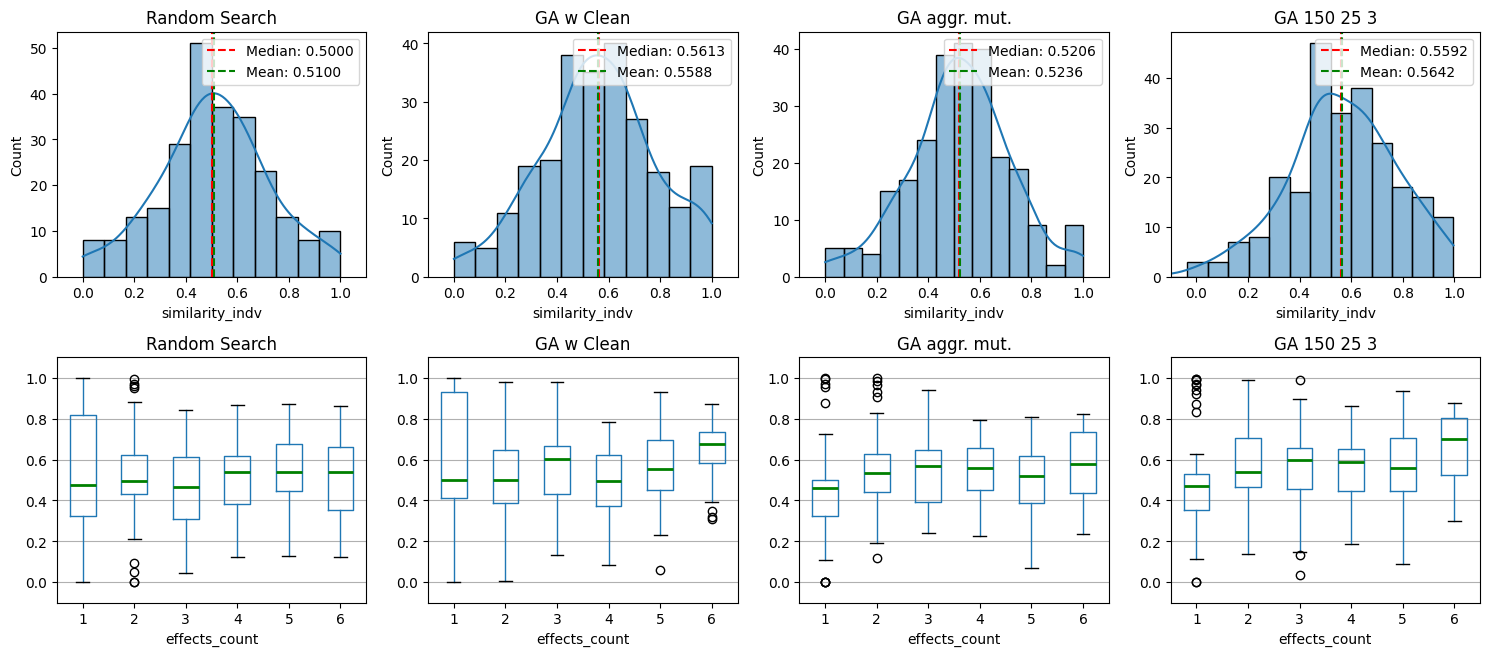

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# List of file paths and titles for the datasets
datasets = [
    ('./results/lines_comp_fitness/first_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_random_search.csv', 'Random Search'),
    ('./results/lines_comp_fitness/first_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean.csv', 'GA w Clean'),
    ('./results/lines_comp_fitness/first_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_aggr_mut.csv', 'GA aggr. mut.'),
    ('./results/lines_comp_fitness/first_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_150_25_3.csv', 'GA 150 25 3')
]

# Function to load data and process 'similarity_indv' column
def load_and_process_data(file_path):
    df = pd.read_csv(file_path)
    df['similarity_indv'] = pd.to_numeric(df['similarity_indv'], errors='coerce')
    return df, df['similarity_indv'].median(), df['similarity_indv'].mean()

# Load all datasets
dataframes = []
for file_path, title in datasets:
    df, median, mean = load_and_process_data(file_path)
    df['effects_count'] = df['applied_effects'].apply(lambda x: len(ast.literal_eval(x)))
    dataframes.append((df, median, mean, title))

# Create a 2x5 grid for the plots
fig, axes = plt.subplots(2, 4, figsize=(15, 7))

# Plot histograms and boxplots for each dataset
for i, (df, median, mean, title) in enumerate(dataframes):
    # Histogram of 'similarity_indv'
    sns.histplot(df['similarity_indv'], kde=True, ax=axes[0, i])
    axes[0, i].axvline(median, color='r', linestyle='--', label=f'Median: {median:.4f}')
    axes[0, i].axvline(mean, color='g', linestyle='--', label=f'Mean: {mean:.4f}')
    axes[0, i].set_title(title)
    axes[0, i].set_xlim(-0.1, 1.1)
    axes[0, i].legend(loc=1)

    # Box plot of 'similarity_indv' vs. 'effects_count'
    df.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, i], 
               medianprops={'color': 'green', 'linewidth': 2})
    axes[1, i].set_title(title)
    axes[1, i].set_ylim(-0.1, 1.1)
    axes[1, i].grid(True, axis='y')

# Adjust layout to prevent clipping and overlapping
plt.tight_layout()
plt.suptitle('')

# Show the combined plot
plt.show()


## Using second sim

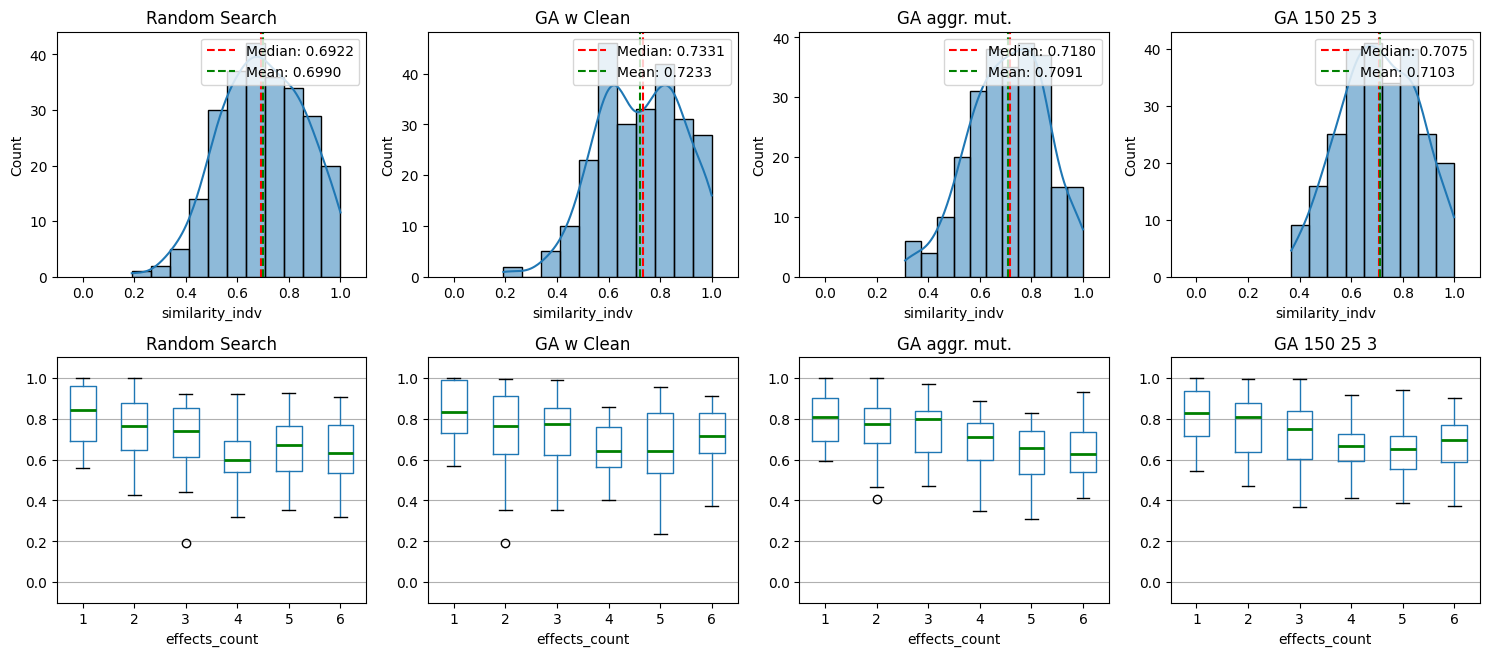

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# List of file paths and titles for the datasets
datasets = [
    ('./results/lines_comp_fitness/gigi_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_random_search_new_diss.csv', 'Random Search'),
    ('./results/lines_comp_fitness/gigi_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_new_diss.csv', 'GA w Clean'),
    ('./results/lines_comp_fitness/gigi_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_aggr_mut_new_diss.csv', 'GA aggr. mut.'),
    ('./results/lines_comp_fitness/gigi_sim/w_clean/dataset_audios_guitar_low_ranges_w_clean_150_25_3_new_diss.csv', 'GA 150 25 3')
]

# Function to load data and process 'similarity_indv' column
def load_and_process_data(file_path):
    df = pd.read_csv(file_path)
    df['similarity_indv'] = pd.to_numeric(df['similarity_indv'], errors='coerce')
    return df, df['similarity_indv'].median(), df['similarity_indv'].mean()

# Load all datasets
dataframes = []
for file_path, title in datasets:
    df, median, mean = load_and_process_data(file_path)
    df['effects_count'] = df['applied_effects'].apply(lambda x: len(ast.literal_eval(x)))
    dataframes.append((df, median, mean, title))

# Create a 2x5 grid for the plots
fig, axes = plt.subplots(2, 4, figsize=(15, 7))

# Plot histograms and boxplots for each dataset
for i, (df, median, mean, title) in enumerate(dataframes):
    # Histogram of 'similarity_indv'
    sns.histplot(df['similarity_indv'], kde=True, ax=axes[0, i])
    axes[0, i].axvline(median, color='r', linestyle='--', label=f'Median: {median:.4f}')
    axes[0, i].axvline(mean, color='g', linestyle='--', label=f'Mean: {mean:.4f}')
    axes[0, i].set_title(title)
    axes[0, i].set_xlim(-0.1, 1.1)
    axes[0, i].legend(loc=1)

    # Box plot of 'similarity_indv' vs. 'effects_count'
    df.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True, ax=axes[1, i], 
               medianprops={'color': 'green', 'linewidth': 2})
    axes[1, i].set_title(title)
    axes[1, i].set_ylim(-0.1, 1.1)
    axes[1, i].grid(True, axis='y')

# Adjust layout to prevent clipping and overlapping
plt.tight_layout()
plt.suptitle('')

# Show the combined plot
plt.show()
